In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from velocity_functions import *
from scipy.integrate import odeint

In [2]:
stokes?

# Heading
I can represent the mixture clearing out, but I want to show it piling up. I may need different functions for the plasma-mixture and mixture-sediment interfaces because the boundary conditions are different. Or, I could have each function give 2 outputs.

In [3]:
def get_ρf(ρ,ρ_in): # concentrations on the faces. Sets up a 0 flux condition by causing the left-most concentration to be the same as the second
    ρf = np.zeros(ngrdf)
    ρf[0] = ρ[0] # change the concentration of the left-most face to be whatever. It should equal the same value as #2 for 0 flux
    ρf[1:] = ρ[:]
    return ρf

def get_cf(ρ):
    cf = -np.ones(ngrdf) # This should be modified to give a speed given a concentration vector
    cf[0] = 0 # sets the wave speed to 0 on the left border.
    return cf

def get_qf(ρ,ρ_in):
    return  get_cf(ρ) * get_ρf(ρ,ρ_in)

def rhsf(ρ,t):
    ρ_in = 0.0
    qf = get_qf(ρ,ρ_in)
    dρdt = 1/Δx*(qf[1:]-qf[:-1])
    return dρdt

#---------------------------

ngrd = 200
L    = 5
tend = 3
ntimes = 10

times = np.linspace(0,tend,ntimes)
ngrdf = ngrd+1
Δx    = L/ngrd
xf    = np.linspace(0,L,ngrdf)
x     = (xf[1:] + xf[:-1])/2

ρ0  = np.ones(ngrd)*0.5
# ρ0[np.where(x>1)]=0  #I can give it a variable initial condition, and the shocks propagate just fine.
# ρ0[np.where(x>1.1)]=0.1
# # ρ0[500:] = 1.0

ρall = odeint(rhsf, ρ0, times)

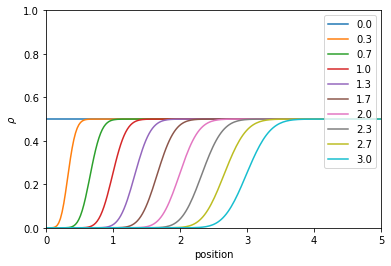

In [4]:
for j in range(ntimes):
    plt.plot(x,ρall[j,:],label=round(times[j],1))
    
plt.xlabel('position')
plt.ylabel(r'$\rho$')
plt.xlim([0,L])
plt.ylim([0,1])
plt.legend(loc=1);

The Current code shows the supernatant-mixture interface. There is zero inlet flux of RBCs.

In [ ]:
def get_ρ(ρ): 
#     ρ[0] = 0
#     ρ[-1] = 0
    return ρ

def get_c(ρ):
    c = np.ones(len(ρ))
#     c[np.where(ρ>=0.95)] = 0.95
    v = (1-ρ)**2
    return v

def get_q(ρ):
    return  get_c(ρ) * (get_ρ(ρ))

# def rhsf(ρ,t):
#     qf = get_qf(ρ)
#     dρdt = -1/Δx*(qf[1:]-qf[:-1])
#     return dρdt

def godunov(ρ,t):
    ρ_bc = np.zeros(ngrd+2)
    ρ_bc[-1] = 1.0
    ρ_bc[1:-1] = ρ

    q = get_q(ρ_bc)
    
    # evaluate fluxes at each cell wall 
    qf = np.zeros(ngrdf)
    for i in range(ngrdf):
        if ρ_bc[i] >= ρ_bc[i+1]:
            qf[i] = max(q[i],q[i+1])
        elif ρ_bc[i] <= 0 and 0 <= ρ_bc[i+1]:
            qf[i] = 0
        else:
            qf[i] = min(q[i],q[i+1])
            
    dρdt = 1/Δx*(qf[:-1]-qf[1:])
    return dρdt
        

#---------------------------

ngrd = 250
L    = 1
tend = 4
ntimes = 40

times = np.linspace(0,tend,ntimes)
ngrdf = ngrd+1
Δx    = L/ngrd
xf    = np.linspace(0,L,ngrdf)
x     = (xf[1:] + xf[:-1])/2

%matplotlib notebook
fig = plt.figure()
fig.figsize=(10,10)

ρ0  = np.ones(ngrd)*0.5
ρall = odeint(godunov, ρ0, times)

<IPython.core.display.Javascript object>


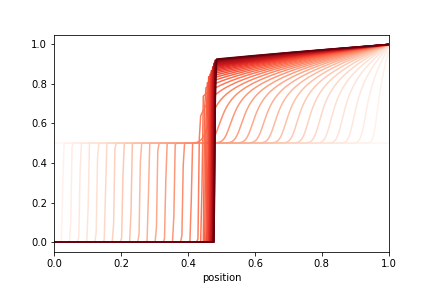

In [8]:
color = plt.get_cmap('Reds')
colors = iter(color(np.linspace(0.0,1,ntimes)))
for j in range(ntimes):
    plt.plot(x,ρall[j,:],color=next(colors))
#     plt.set_ylabel(str(ngrd))
#     plt.set_xlim((0,L))

plt.xlabel('position')
# plt.ylabel(r'$\rho$')
plt.xlim([0,L]);
# plt.ylim([0,1]);
# plt.legend(loc=0);
plt.show()

See my equations, including continuity.  
make sure particles don't change density.  
Use K as a function of $\Omega$

In [ ]:
test = np.array([-2,-1,0,1,2,3])
for i in range(len(test)):
    print(test[i])
    if test[i] <= 0 and 0 <= test[i+1]:
        print('i is - or 0. i+1 is 0 or +')